# Linear zeitinvariante Systeme (LZI/LTI)
<a id="Sec-LZI_system"></a>

Linear zeitinvariante Systeme (LZI, engl.: LTI) sind wichtig, da, obwohl sie zwar sehr vereinfacht sind und die Realität nur bedingt abbilden, sehr gut zu lösen sind. Sie sind in der Tat die einzigen Systeme, die wir lösen können (mittels Differentialgleichungen). 

Für ein LTI System können Ausgangssignale vorhergesagt werden, die man für bestimmte Eingangssignale erwarten würde. Das gleiche gilt auch für *Veränderungen* von Eingangssignalen. 

## Eigenschaften

LTIs haben bestimmte Eigenschaften: *Superposition, Homogenität und Zeitinvarianz*.
Im Folgenden sei $h$ ein Operator, der eine lineare Abbildung zwischen Eingangsvektor $x(t)$ und dem Ausgang eines Systems, Vektor $y(t)$, darstellt (siehe {numref}`LTI`).

:::{figure-md} LTI
<img src="draw/LTI.jpg" alt="LTI" class="bg-primary mb-1" width="400px" label = LTI>

Linear zeitinvariantes (LZI) System $h(x)$ mit Eingangsfunktion $x(t)$ und Ausgangsfunktion $y(t) = h(x(t))$. 
:::

Für ein **lineares System** gelten allgemein folgende Eigenschaften.


:::::{grid} 2

::::{grid-item}
* **Homogenität**: Wenn $x(t)$ mit Faktor $a$ skaliert wird, dann wird $y(t)$ ebenso skaliert
    * Ein Sprung der Größe $A$ produziert eine Schwingung mit Größe $B$
    * Da h(x) linear ist, wird ein verdoppelter Sprung am Eingang, also $2A$ zu einer Verdopplung am Ausgang, $2B$, führen
::::

::::{grid-item}
:::{figure-md} LTI_homo
<img src="draw/LTI_homo.jpg" alt="LTI_homo" class="bg-primary mb-1" width="400px" label = LTI_homo>

Homogenität
:::
::::
:::::

:::::{grid} 2

::::{grid-item}
* **Superposition** bedeutet Additivität: Addiere zwei Eingangssignale, $A$ und $B$ zusammen, sprich $A+B$, dann ist die Antwort des linearen Systems auch die Summe der individuellen Ausgänge ($a$ und $b$), also $a+b$. 
::::

::::{grid-item}
:::{figure-md} LTI_super
<img src="draw/LTI_super.jpg" alt="LTI_super" class="bg-primary mb-1" width="400px" label = LTI_super>

Superposition
:::
::::
:::::


:::::{grid} 2

::::{grid-item}
* **Zeitinvariant**: Das System verhält sich immer gleich, egal wann in der Zeit es durchgeführt wird.
    * Wird das Eingangssignal $x(t)$ um $T$ verschoben, dann ist auch das Ausgangssignal um $T$ verschoben.
::::

::::{grid-item}
:::{figure-md} LTI_zeit
<img src="draw/LTI_zeit.jpg" alt="LTI_zeit" class="bg-primary mb-1" width="400px" label = LTI_zeit>

Zeitinvariant
:::
::::
:::::

In Realität gibt es fast immer Abweichungen von diesen Idealvorstellungen. D.h. wir können mit LTIs Eingänge eines Signals skalieren, verschieben und summieren, aber sie entsprechen niemals einem realen System. Warum sind sie dann so wichtig? Richard Feynman sagte damals: „Linear Systems are important, because we can solve them“. 
Selbst wenn LTI nicht real ist, so können wir reale Probleme sehr gut *annähern* indem wir LTI Analysen durchführen.
Das heißt, stell immer sicher, dass dein System für einen bestimmten Bereich linear funktioniert. 

## System-Identifizierung
<a id="Sec-System-Identifizierung"></a>

Jedes Messsystem hat eine spezifische Übertragungsfunktion $h(t)$, welche, angewendet auf ein Eingangssignal $x(t)$, ein Ausgangssignal $y(t)$ liefert. Im Allgemeinen kann man drei Probleme in der Praxis erkennen, je nachdem welche Informationen einem vorliegen:

1. $x(t)$ und $h(t)$ sind gegeben -> $y(t)$ ist gesucht: Dies ist das **Simulationsproblem**
    * Anhand von Simulationen kann der Ausgang eines Systems vorhergesagt werden.
2. $h(t)$ und $y(t)$ sind gegeben -> $x(t)$ ist gesucht: Dies ist das **Kontrollproblem**
    * Dieses Problem wird man in der Regelungstechnik häufig antreffen, wo eine Regelgröße am Eingang des Mess- bzw. Regelsystems gesucht wird um einen stabilen Zustand zu erreichen.
3. $u(t)$ und $y(t)$ gegeben -> $h(t)$ ist gesucht: Dies ist das **System-Identifizierungsproblem**
    * Hier wollen wir das Messsystem charaktisieren, was unter anderem durch 2 Methoden möglich ist: Mittels Messungen der Eingangs- und Ausgangsgröße, oder mittels Aufstellen von Differentialgleichungen (Systemtheorie).
    
Während Probleme 1 und 2 Bestandteil anderer Vorlesungen oder Themengebiete sind, wollen wir uns im Folgenden mit dem Problem 3 befassen. Hier wollen wir zwei Möglichkeiten betrachten, mittels welcher $h(t)$ bestimmt werden kann. Die beiden Methoden werden mit **black box** und **white box** bezeichnet. 

In allen Kapiteln wird der Inhalt am Beispiel eines Tiefpasses 1. Ordnung noch einmal konkreter erläutert.

:::{figure-md} black_white_box
<img src="draw/black_white_box.jpg" alt="black_white_box" class="bg-primary mb-1" width="800px" label = black_white_box>

System-Identifizierung mittels black und white Box-Verfahren. Beides führt zur Bestimmung der Übertragungsfunktion des gesuchten Systems $h(x)$, bzw. $G(f)$ im Fourier-Raum.
:::

## Testfunktionen

In der Messtechnik wird das Übertragungsverhalten einer Messeinrichtung mittels Testfunktionen im Labor überprüft. **Sprung** und **Impuls** gehören zu den meist benutzten Testfunktionen, doch auch eine **Rampen**funktion (ein sich kontinuierlich erhöhendes Eingangssignal) oder ein **Sweep** (hier werden verschiedene Frequenzen direkt nacheinander durchgefahren) haben sich bewährt. 

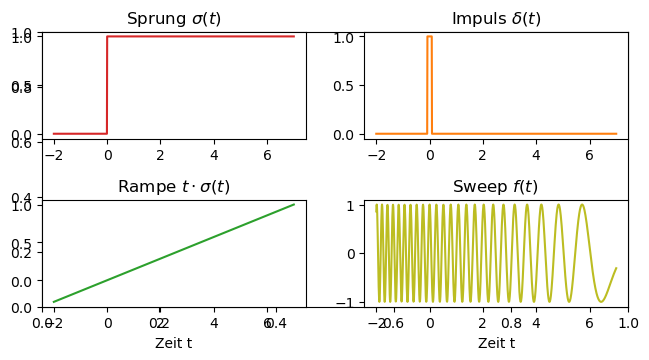

In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

def heaviside_step_function(t):
    if t < 0:
        res = 0
    else:
        res = 1
    return res

# Transfer Funktion Tiefpass:
K = 1 # Verstärkungsfaktor
T = 1 # Zeit nach der 63% des Signals erreicht ist
num = np.array([K])
den = np.array([T , 1])
H = signal.TransferFunction(num , den)

T = 1
t2 = np.linspace(-2*T, 7*T, 1000, endpoint = True)

# Sprung
y_step = []
for i in t2:
    y_step.append(heaviside_step_function(i))
    
# Impuls:
def ddf(x,sig):
    val = np.zeros_like(x)
    val[(-(1/(2*sig))<=x) & (x<=(1/(2*sig)))] = 1
    return val
y_impuls = ddf(t2,6.)

# Sprungantwort:
t, y = signal.step(H)

# Impulsantwort
t_imp, y_imp = signal.impulse(H)


# Impuls:
def ddf(x,sig):
    val = np.zeros_like(x)
    val[(-(1/(2*sig))<=x) & (x<=(1/(2*sig)))] = 1
    return val

y_impuls = ddf(t2,6.)

# Plotting
fig, ax = plt.subplots(figsize=(7,4))
plt.subplot(2,2,1)
plt.plot(t2,y_step, color = 'tab:red', label = 'Sprunganregung')
plt.title(r'Sprung $\sigma(t)$')
plt.subplot(2,2,2)
plt.plot(t2,y_impuls, color = 'tab:orange', label = 'Impuls')
plt.title(r'Impuls $\delta(t)$')
plt.subplot(2,2,3)
plt.plot(t2,t2/np.max(t2), color = 'tab:green', label = 'Rampe')
plt.title(r'Rampe $t\cdot \sigma(t)$ ')
plt.xlabel("Zeit t")

plt.subplot(2,2,4)
plt.plot(t2,signal.chirp(t2, f0=4, f1=0.2, t1=7, method='linear'), color = 'tab:olive', label = 'Shirp')
plt.title(r'Sweep $f(t)$ ')
plt.xlabel("Zeit t")

plt.tight_layout()

Das Vorgehen ist wie folgt: Es wird eine Testfunktion als Eingangssignal $u_e(t)$ angelegt und gemessen. Der Ausgang des Systems wird abgegriffen und das Ausgangssignal $u_a(t)$ ebenfalls gemessen. Ein Vergleich aus angelegtem Eingangssignal und gemessener Systemantwort (Ausgangssignal) können Rückschlüsse für das System getroffen werden. 